Sending this image to the API:


<>:10: SyntaxWarning: invalid escape sequence '\J'
<>:10: SyntaxWarning: invalid escape sequence '\J'
C:\Users\fpsju\AppData\Local\Temp\ipykernel_40632\1878202813.py:10: SyntaxWarning: invalid escape sequence '\J'
  IMAGE_PATH = "J:\Julio Data\pruebinha.jpg"


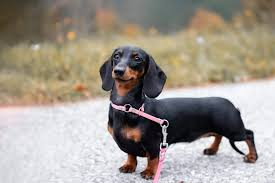


❌ Error: Received status code 500
Response Text: Internal Server Error


In [ ]:
import requests
import json
from IPython.display import Image as IPImage # To display the image in the notebook

# --- Configuration ---
# This is your live API URL
API_URL = "https://sera-perrosalchicha-o-no.onrender.com/predict" 

# ❗ IMPORTANT: Change this to the path of an image on your PC
# New line with forward slashes
IMAGE_PATH = "J:/Julio Data/pruebinha.jpg"

# --- Optional: Display the image you're sending ---
print(f"Sending this image to the API:")
display(IPImage(filename=IMAGE_PATH, width=400))


# --- Send the Request ---
try:
    # Open the image file in binary read mode
    with open(IMAGE_PATH, "rb") as image_file:
        files = {"file": (IMAGE_PATH, image_file, "image/jpeg")}
        response = requests.post(API_URL, files=files)

    # --- Process the Response ---
    if response.status_code == 200:
        print("\n✅ Success! API returned the following detections:")
        detections = response.json()
        # Pretty-print the JSON response
        print(json.dumps(detections, indent=2))
    else:
        print(f"\n❌ Error: Received status code {response.status_code}")
        print("Response Text:", response.text)

except FileNotFoundError:
    print(f"❌ Error: The file was not found at {IMAGE_PATH}")
except requests.exceptions.RequestException as e:
    print(f"❌ Error: A connection error occurred: {e}")